In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

In [2]:
# Read data from the student_grades table in the school_sample database on our mySQL server. 

import os

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_student_data():
    filename = "student_grades.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql('SELECT * FROM student_grades', get_connection('school_sample'))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df

In [3]:
df = get_student_data()

In [4]:
df.head()

,Unnamed: 0,student_id,exam1,exam2,exam3,final_grade
0,0,1,100.0,90,95,96
1,1,2,98.0,93,96,95
2,2,3,85.0,83,87,87
3,3,4,83.0,80,86,85
4,4,5,93.0,90,96,97


In [5]:
df.shape

(104, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   104 non-null    int64  
 1   student_id   104 non-null    int64  
 2   exam1        103 non-null    float64
 3   exam2        104 non-null    int64  
 4   exam3        104 non-null    object 
 5   final_grade  104 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.0+ KB


In [11]:
#Exposing white space
df.exam3.value_counts()

96    16
78    16
75    15
95     8
87     8
86     8
85     8
94     8
70     8
79     8
       1
Name: exam3, dtype: int64

In [13]:
df.describe()

,Unnamed: 0,student_id,exam1,exam2,final_grade
count,104.000000,104.000000,103.000000,104.000000,104.000000
mean,51.500000,52.500000,78.621359,77.307692,81.692308
std,30.166206,30.166206,14.260955,10.295703,10.918122
min,0.000000,1.000000,57.000000,65.000000,65.000000
25%,25.750000,26.750000,70.000000,70.000000,72.000000
50%,51.500000,52.500000,79.000000,75.000000,81.000000
75%,77.250000,78.250000,92.000000,89.000000,93.000000
max,103.000000,104.000000,100.000000,93.000000,97.000000


In [15]:
#Find null
df.isnull().sum()

Unnamed: 0     0
student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

In [16]:
#index of missing value in exam1 is 103
df[df.exam1.isnull()].index

Int64Index([103], dtype='int64')

In [19]:
#we saw one record that looked that way
df.exam3.value_counts(ascending=True)

       1
95     8
87     8
86     8
85     8
94     8
70     8
79     8
75    15
96    16
78    16
Name: exam3, dtype: int64

In [20]:
#casting whitespace as an integer does not work
df.exam3.astype(int)

ValueError: invalid literal for int() with base 10: ' '

In [21]:
#regex for replacing whitespace
# ^: "starts with"
#\s: "any type of whitespace"
# * : "zero or more times"
# $ : "ends with"
# '^\s*$': something that starts with any whitespace character for zero or more times until the end

In [22]:
#Change the whitespace into a null value using regex
df.exam3.replace(r'^\s*$', np.NaN, regex=True)

0      95
1      96
2      87
3      86
4      96
       ..
99     79
100    70
101    75
102    78
103    79
Name: exam3, Length: 104, dtype: object

In [23]:
df = df.replace(r'^\s*$', np.NaN, regex=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   104 non-null    int64  
 1   student_id   104 non-null    int64  
 2   exam1        103 non-null    float64
 3   exam2        104 non-null    int64  
 4   exam3        103 non-null    object 
 5   final_grade  104 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.0+ KB


In [27]:
df = df.dropna()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 102
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   102 non-null    int64  
 1   student_id   102 non-null    int64  
 2   exam1        102 non-null    float64
 3   exam2        102 non-null    int64  
 4   exam3        102 non-null    object 
 5   final_grade  102 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.6+ KB


In [30]:
#is there any instance where the integer version of exam 1 is not equivalent to the grade as it
#currently stands
(df.exam1.astype(int) != df.exam1).sum()

0

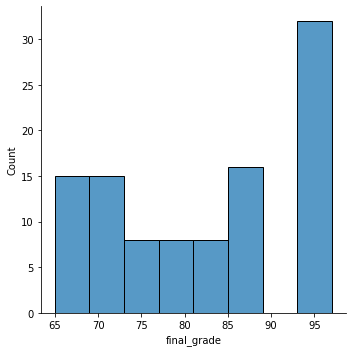

In [31]:
sns.displot(x='final_grade', data = df) 

In [40]:
#columns
columns = list(df.columns)

In [38]:
df.drop('student_id', axis=1, inplace=True)

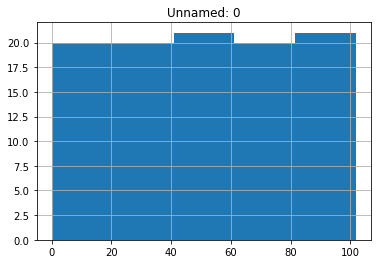

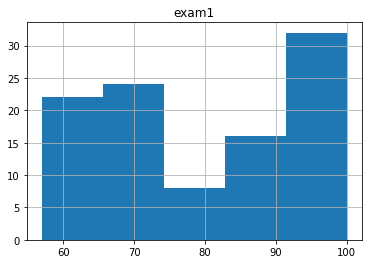

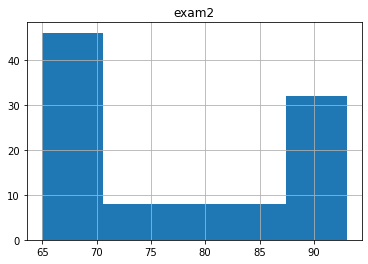

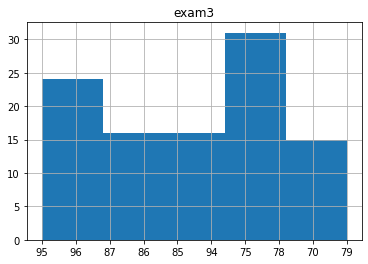

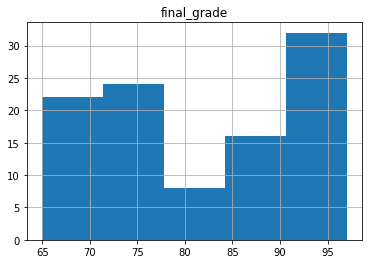

In [41]:
for i, col in enumerate(columns):
    df[col].hist(bins=5)
    plt.title(col)
    plt.show()